# Séance 1 :  Deep Learning - Introduction à Pytorch 

Les notebooks sont très largement inspirés des cours de **N. Baskiotis et B. Piwowarski**. Ils peuvent être complétés efficacement par les tutoriels *officiels* présents sur le site de pytorch:
https://pytorch.org/tutorials/

Au niveau de la configuration, toutes les installations doivent fonctionner sur Linux et Mac. Pour windows, ça peut marcher avec Anaconda à jour... Mais il est difficile de récupérer les problèmes.

* Aide à la configuration des machines: [lien](https://dac.lip6.fr/master/environnement-deep/)
* Alternative 1 à Windows: installer Ubuntu sous Windows:  [Ubuntu WSL](https://ubuntu.com/wsl)
* Alternative 2: travailler sur Google Colab (il faut un compte gmail + prendre le temps de comprendre comment accéder à des fichers) [Colab](https://colab.research.google.com)

# A. Préambule

Les lignes suivantes permettent d'importer pytorch et vérifier si un GPU est disponible.

In [2]:
import torch
print("La version de torch est : ",torch.__version__)
print("Le calcul GPU est disponible ? ", torch.cuda.is_available())

import matplotlib.pyplot as plt
import numpy as np
import sklearn

La version de torch est :  1.13.0+cu117
Le calcul GPU est disponible ?  False


In [4]:
# pour le chargement des données MNIST (à la fin)
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms

## Syntaxe

Le principal objet manipulé sous Pytorch est **torch.Tensor** qui correspond à un tenseur mathématique (généralisation de la notion de matrice en $n$-dimensions), très proche dans l'utilisation de **numpy.array**.   Cet objet est optimisé pour les calculs sur GPU ce qui implique quelques contraintes plus importantes que sous **numpy**. En particulier :
* le type du tenseur manipulé est très important et les conversions ne sont pas automatique (**FloatTensor** de type **torch.float**, **DoubleTensor** de type **torch.double**,  **ByteTensor** de type **torch.byte**, **IntTensor** de type **torch.int**, **LongTensor** de type **torch.long**). Pour un tenseur **t** La conversion se fait très simplement en utilisant les fonctions : **t.double()**, **t.float()**, **t.long()** ...
* la plupart des opérations ont une version *inplace*, c'est-à-dire qui modifie le tenseur plutôt que de renvoyer un nouveau tenseur; elles sont suffixées par **_** (**add_** par exemple).

Voici ci-dessous quelques exemples d'opérations usuelles, n'hésitez pas à vous référez à la [documentation officielle](https://pytorch.org/docs/stable/tensors.html) pour la liste exhaustive des opérations.


In [5]:
# Création de tenseurs et caractéristiques
## Créer un tenseur à partir d'une liste
print(torch.tensor([[1.,2.,3.],[2.,3,4.]])) 
## Créer un tenseur  tenseur rempli de 1 de taille 2x3x4
print(torch.ones(2,3,4)) 
## tenseur de zéros de taille 2x3 de type float
print(torch.zeros(2,3,dtype=torch.float))  


tensor([[1., 2., 3.],
        [2., 3., 4.]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [6]:

## tirage uniforme entier entre 10 et 15, 
## remarquez l'utilisation du _ dans random pour l'opération inplace
print(torch.zeros(2,3).random_(10,15)) 
## tirage suivant la loi normale
a=torch.zeros(2,3).normal_(1,0.1)
print(a)
## equivalent à zeros(3,4).normal_
b = torch.randn(3,4) 
print(b)
## Création d'un vecteur
c = torch.randn(3)
print(c)

tensor([[10., 13., 13.],
        [12., 13., 12.]])
tensor([[1.0639, 1.1589, 1.1052],
        [0.8915, 0.9541, 0.9379]])
tensor([[-1.5211,  1.7089,  0.2703,  0.6607],
        [-0.8275,  1.5839, -1.6362,  1.5110],
        [-0.0473,  0.4667,  0.4528, -0.9543]])
tensor([ 0.3882,  0.2874, -0.5953])


In [5]:

## concatenation de tenseurs
print(torch.cat((a,a),1))
## Taille des tenseurs/vecteurs shape => size
print(a.size(1),b.shape,b.size())
## Conversion de type
print(a.int(),a.int().type())

tensor([[1.0258, 1.0963, 0.9744, 1.0258, 1.0963, 0.9744],
        [1.0587, 0.9920, 1.0075, 1.0587, 0.9920, 1.0075]])
3 torch.Size([3, 4]) torch.Size([3, 4])
tensor([[1, 1, 0],
        [1, 0, 1]], dtype=torch.int32) torch.IntTensor


In [7]:

# Opérations élémentaires sur les tenseurs 
## produit scalaire (et contrairement à numpy, que produit scalaire)
print(c.dot(c))
## produit matriciel : utilisation de @ ou de la fonction mm
print(a.mm(b), a @ b)
## transposé
print(a.t(),a.T)
## index du maximum selon une dimension
print("argmax : ",a.argmax(dim=1))
## somme selon une dimension/de tous les éléments
print(b.sum(1), b.sum()) 
## moyenne selon  une dimension/sur tous les éléments
print(b.mean(1), b.mean())

tensor(0.5878)
tensor([[-2.6297,  4.1696, -1.1083,  1.3994],
        [-2.1899,  3.4724, -0.8955,  1.1356]]) tensor([[-2.6297,  4.1696, -1.1083,  1.3994],
        [-2.1899,  3.4724, -0.8955,  1.1356]])
tensor([[1.0639, 0.8915],
        [1.1589, 0.9541],
        [1.1052, 0.9379]]) tensor([[1.0639, 0.8915],
        [1.1589, 0.9541],
        [1.1052, 0.9379]])
argmax :  tensor([1, 1])
tensor([ 1.1186,  0.6312, -0.0821]) tensor(1.6678)
tensor([ 0.2797,  0.1578, -0.0205]) tensor(0.1390)


In [10]:
## ATTENTION: la spécificité et les capacités des tenseurs empêchent les conversions à la volée
# ce qui marchait en numpy ne marche plus en torch

# print(a@[[1], [1], [1]])    # ERREUR de type (même résultat avec n'importe quelle opération)
print(a*2)                  # OK pour un scalaire
# print(a*[2.,2.,2.])         # ERREUR de type

tensor([[2.1278, 2.3178, 2.2104],
        [1.7829, 1.9082, 1.8759]])


In [11]:

## somme/produit/puissance termes a termes
print(a+a, "\n", a*a, "\n", a**2)
## attention ! comme sous numpy, il peut y avoir des pièges ! 
## Vérifier toujours les dimensions !!
d=torch.zeros(5,1)
e = torch.zeros(5)
print(d,e)
## la première opération fait un broadcast et le résultat est tenseur à 2 dimensiosn,
## le résultat de la deuxième opération est bien un vecteur
print(d-e,d.t()-e)

tensor([[2.1278, 2.3178, 2.2104],
        [1.7829, 1.9082, 1.8759]]) 
 tensor([[1.1319, 1.3431, 1.2215],
        [0.7947, 0.9103, 0.8797]]) 
 tensor([[1.1319, 1.3431, 1.2215],
        [0.7947, 0.9103, 0.8797]])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]) tensor([0., 0., 0., 0., 0.])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) tensor([[0., 0., 0., 0., 0.]])


In [12]:

## changer les dimensions du tenseur (la taille totale doit être inchangée) = np.reshape
b = torch.randn(3,4) 
print(b)
print(b.view(2,6))

# on utilise souvent view pour passer de matrice à vecteur
e=torch.tensor([[1],[1],[1],[1]], dtype=torch.float)
print(e)
d = b@e
print(d)
# conversion en vecteur
print(d.view(-1))

# usage typique
y = torch.tensor([1,-1,1], dtype=torch.float)
print(d > y)            # résultat catastrophique (dispatch)
print(d.view(-1) > y)   # résultat attendu

tensor([[ 2.5828,  1.7703, -0.0596, -0.7327],
        [ 2.0084, -0.5536, -0.3492,  1.1030],
        [-1.6760, -0.3032,  0.6674, -0.3052]])
tensor([[ 2.5828,  1.7703, -0.0596, -0.7327,  2.0084, -0.5536],
        [-0.3492,  1.1030, -1.6760, -0.3032,  0.6674, -0.3052]])
tensor([[1.],
        [1.],
        [1.],
        [1.]])
tensor([[ 3.5608],
        [ 2.2087],
        [-1.6171]])
tensor([ 3.5608,  2.2087, -1.6171])
tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])
tensor([ True,  True, False])


# B. Autograd et graphe de calcul
Un élément central de pytorch est le graphe de calcul : lors du calcul d'une variable, l'ensemble des opérations qui ont servies au calcul sont stockées sous la forme d'un graphe acyclique, dit de *calcul*. Les noeuds internes du graphe représentent les opérations, le noeud terminal le résultat et les racines les variables d'entrées. Ce graphe sert en particulier à calculer les dérivées partielles de la sortie par rapport aux variables d'entrées - en utilisant les règles de dérivations chainées des fonctions composées. 
Pour cela, toutes les fonctions disponibles dans pytorch comportent un mécanisme, appelé *autograd* (automatique differentiation), qui permet de calculer les dérivées partielles des opérations. 

## B.1. Différenciation automatique
(De manière simplifiée, pour les détails cf [la documentation](https://pytorch.org/docs/stable/notes/extending.html))

Toute opération sous pytorch hérite de la classe **Function** et doit définir :
* une méthode **forward(\*args)** : passe avant, calcule le résultat de la fonction appliquée aux arguments 
* une méthode **backward(\*args)** : passe arrière, calcule les dérivées partielles par rapport aux entrées. Les arguments de  cette méthode correspondent aux valeurs des dérivées suivantes dans le graphe de calcul. En particulier, il y a autant d'arguments à **backward**  que de sorties pour la méthode **forward** (rétro-propagation : on doit connaître les dérivés qui viennent  en aval du calcul) et autant de sorties que d'arguments dans la méthode **forward** (chaque sortie correspond à  une dérivée partielle par rapport à chaque entrée du module). Le calcul se fait sur les valeurs du dernier appel de **forward**. 

Par exemple, pour la fonction d'addition  **add(x,y)**, **add.forward(x,y)** renverra **x+y** (l'appel de la fonction est équivalent à l'appel de **forward**) et **add.backward(1)** renverra le couple **(1,1)** (la dérivée par rapport à x, et celle par rapport à y) .

En pratique, ce ne sont pas les méthodes de ces fonctions qui sont utilisées, mais des méthodes équivalentes sur les tenseurs. La méthode **backward** d'un tenseur permet de rétro-propager le calcul du gradient sur toutes les variables qui ont servies à son calcul.

La valeur du gradient pour chaque dérivée partielle se trouve dans l'attribut **grad** de la variable concernée. 

Comme c'est un mécanisme lourd, l'autograd n'est pas activé par défaut pour une variable. Afin de l'activer, il faut mettre le flag **requires_grad** de cette variable à vrai. Dès lors, tout calcul qui utilise cette variable sera enregistré dans le graphe de calcul et le gradient sera disponible.


Exemple : 

In [13]:
a = torch.tensor(1.)
# Par défaut, requires_grad est à False
print("Graphe de calcul ? ",a.requires_grad)
# On peut demander à ce que le graphe de calcul soit retenu
a.requires_grad = True 
# Ou lors de la création du tenseur directement
b = torch.tensor(2.,requires_grad=True)
z = 2*a + b
# Calcul des dérivées partielles par rapport à z
z.backward()
print("Dérivée de z/a : ", a.grad.item()," z/b :", b.grad.item())

# Si on a oublié de demander le graphe de calcul :
a, b = torch.tensor(1.),torch.tensor(2.)
z = 2*a+b
try: # on sait que ça va provoquer une erreur
  z.backward()
except Exception as e: # erreur => simple message
  print("Erreur : ", e)

Graphe de calcul ?  False
Dérivée de z/a :  2.0  z/b : 1.0
Erreur :  element 0 of tensors does not require grad and does not have a grad_fn


## B.2. <span class="alert-success">     Exercice :  Utilisation de backward     </div>
* Implémentez (en une ligne) la fonction de coût aux moindres carrés $MSE(\hat{y},y)=\frac{1}{2N} \sum_{i=1}^N\|\hat{y_i}-y_i\|^2$ où $\hat{y},y$ sont deux matrices de taille $N\times d$, et $y_i,\hat{y_i}$ les $i$-èmes vecteurs lignes des matrices.
* Engendrez **y,yhat** deux matrices aléatoires de taille $(1,5)$.
* Calculez **MSE(y,yhat)**
* Calculez à la main le gradient de **MSE** par rapport à **y**, **yhat**
* Calculez grâce à pytorch le gradient de **MSE** par rapport à **y** et **yhat** et vérifier le résultat.
* Appelez une deuxième fois **MSE** sur les mêmes vecteurs et la méthode **backward**. Qu'observez vous pour le gradient ? Comment l'expliquez vous ?

In [14]:
def MSE(yhat,y):
    # return ((yhat - y)**2).sum()/(2 * len(y))
    # return ((yhat - y)**2).mean()/2
    return torch.nn.MSELoss()(y, yhat)/2

# y = torch.randn(1,5,requires_grad=True)
# yhat = torch.randn(1,5,requires_grad=True)
y = torch.tensor([-0.9815,  0.4935, -0.1612,  0.4270,  0.3370], requires_grad=True)
yhat = torch.tensor([-0.6747,  0.3059,  1.6617,  1.3496, -1.2133], requires_grad=True)
# # y1 = torch.tensor([[2.],[3.]], requires_grad=True)
# yhat1 = torch.tensor([[1.],[1.]], requires_grad=True)
# print(y)
# print(y1)
# print(y, "\n", yhat)
mse = MSE(yhat,y)
print("MSE :" ,mse)
print("\t y :\t", y, "\n \t yhat :\t", yhat)

# 1. retro-propager l'erreur
mse.backward()
# 2. afficher le gradient sur les deux vecteurs et comprendre ce qui se passe
print("Gradient \n \t y :\t", y.grad, "\n \t yhat :\t", yhat.grad)
# 3. faire une itération supplémentaire et afficher de nouveau
mse = MSE(yhat,y)
mse.backward()
print("Gradient \n \t y: \t", y.grad, "\n \t yhat :\t", yhat.grad)

MSE : tensor(0.6707, grad_fn=<DivBackward0>)
	 y :	 tensor([-0.9815,  0.4935, -0.1612,  0.4270,  0.3370], requires_grad=True) 
 	 yhat :	 tensor([-0.6747,  0.3059,  1.6617,  1.3496, -1.2133], requires_grad=True)
Gradient 
 	 y :	 tensor([-0.0614,  0.0375, -0.3646, -0.1845,  0.3101]) 
 	 yhat :	 tensor([ 0.0614, -0.0375,  0.3646,  0.1845, -0.3101])
Gradient 
 	 y: 	 tensor([-0.1227,  0.0750, -0.7292, -0.3690,  0.6201]) 
 	 yhat :	 tensor([ 0.1227, -0.0750,  0.7292,  0.3690, -0.6201])



## B.3. <span class="alert-success"> Exercice :   Régression linéaire en pytorch </span>

* Définissez la fonction **flineaire(x,w,b)** fonction linéaire qui calcule $f(x,w,b)=x.w^t+b$  avec $x\in \mathbb{R}^{{n\times d}},~w\in\mathbb{R}^{1,d}, b\in \mathbb{R}$
* Complétez le code ci-dessous pour réaliser une descente de gradient et apprendre les paramètres optimaux de la regression linéaire : $$w^∗,b^∗=\text{argmin}_{w,b}\frac{1}{N} \sum_{i=1}^N \|f(x^i,w,b)-y^i\|^2$$

Pour tester votre code, utilisez le jeu de données très classique *Boston*, le prix des loyers à Boston en fonction de caractéristiques socio-économiques des quartiers. Le code ci-dessous permet de les charger.

<span style="color:red"> ATTENTION ! </span>
* pour la mise-à-jour des paramètres, <span style="color:red">vous ne pouvez pas faire directement</span> 
$$w = w-\epsilon*gradient$$ 
(pourquoi ?). Vous devez passer par w.data qui permet de ne pas enregistrer les opérations dans le graphe de calcul (ou utiliser la méthode ```.detach()``` d'une variable qui permet de créer une copie détachée du graphe de calcul). 
* Note: il est aussi possible de faire:
    ```
    with torch.no_grad():
        w -= eps*gradient
    ```
    * Désactivation temporaire du graph de calcul, on manipule les tensors comme des variables classiques
    * ATTENTION à faire des ```-=``` ou ```+=``` => Si vous construisez un nouveau tenseur, il ne se reconnectera pas au graphe de calcul!
* l'algorithme doit converger avec la valeur de epsilon fixée; si ce n'est pas le cas, il y a une erreur (la plupart du temps au niveau du calcul du coût).


In [19]:
def flineaire(x,w,b):
    return x@w.T + b

## Chargement des données Boston (depuis sklearn) et transformation en tensor.
from sklearn.datasets import load_boston
boston = load_boston() ## chargement des données
boston_x = torch.tensor(boston['data'],dtype=torch.float) # penser à typer les données pour éliminer les incertitudes
boston_y = torch.tensor(boston['target'],dtype=torch.float)

print("Nombre d'exemples : ",boston_x.size(0), "Dimension : ",boston_x.size(1))
print("Nom des attributs : ", ", ".join(boston['feature_names']))


Nombre d'exemples :  506 Dimension :  13
Nom des attributs :  CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT


In [23]:

EPOCHS = 200
EPS = 1e-6
#initialisation aléatoire de w et b
w = torch.randn(1,boston_x.size(1),requires_grad=True)
b =  torch.randn(1,1,requires_grad=True)
loss_h = []
# torch.nn.MSELoss()(w.data,b)
# print(loss_h)
for i in range(EPOCHS):
    ## SOLUTION 1: Penser à aller chercher w.data (et sa contrepartie dans le gradient)
    yhat = flineaire(boston_x, w, b) # [506,1]
    yhat = yhat.view(-1) # passage en mode vecteur [506] On a redimensionné notre matrice
    # 1. Construire la loss (+stocker la valeur dans loss_h)
    loss = MSE(yhat, boston_y)
    loss_h.append(loss.data)
    # 2. Retro-propager
    loss.backward()
    # 3. MAJ des paramètres
    w.data -= EPS*w.grad
    b.data -= EPS*b.grad
    # 4. Penser à remettre le gradient à 0 (cf exo précédent)
    w.grad.zero_()
    b.grad.zero_()

In [24]:
# une seconde version du même code avec l'environnement torch.no_grad()
# attention, dans ce cas, le += est obligatoire
# code identique (juste changer les 2 lignes de MAJ)

EPOCHS = 200
EPS = 1e-6
#initialisation aléatoire de w et b
w = torch.randn(1,boston_x.size(1),requires_grad=True)
b =  torch.randn(1,1,requires_grad=True)
loss_h = [] # sauvegarde des valeurs de loss (pas si trivial!)
for i in range(EPOCHS):
    yhat = flineaire(boston_x, w, b) # [506,1]
    yhat = yhat.view(-1) # passage en mode vecteur [506] On a redimensionné notre matrice
    # 1. Construire la loss (+stocker la valeur dans loss_h)
    loss = MSE(yhat, boston_y)
    loss_h.append(loss.data)
    # 2. Retro-propager
    loss.backward()
    # 3. MAJ des paramètres
    with torch.no_grad():
        w -= EPS*w.grad
        b -= EPS*b.grad
    # 4. Penser à remettre le gradient à 0 (cf exo précédent)
    w.grad.zero_()
    b.grad.zero_()

Text(0, 0.5, 'mse loss')

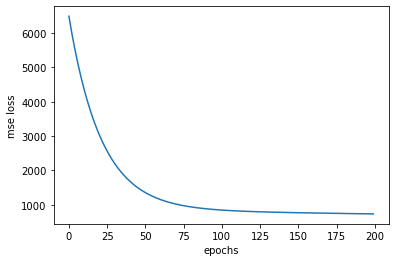

In [26]:
# affichage de l'optimisation
plt.figure()
plt.plot(loss_h)
plt.xlabel("epochs")
plt.ylabel("mse loss")


## Optimiseur 
La descente de gradient représente en fait un code standard puisque les dérivées sont calculées automatiquement et que les variables sont idéntifiées.
Pytorch inclut une classe très utile pour la descente de gradient, [torch.optim](https://pytorch.org/docs/stable/optim.html), qui permet :
* d'économiser quelques lignes de codes
* d'automatiser la mise-à-jour des paramètres 
* d'abstraire le type de descente de gradient utilisé (sgd,adam, rmsprop, ...)

Une liste de paramètres à optimiser est passée à l'optimiseur lors de l'initialisation. La méthode **zero_grad()** permet de remettre le gradient à zéro et la méthode **step()** permet de faire une mise-à-jour des paramètres.

Un exemple de code  utilisant l'optimiseur est donné ci-dessous. Testez et comparez les résultats.


In [27]:
Xdim = boston_x.size(1)
EPOCHS = 4000

w = torch.randn(1, Xdim, dtype=torch.float, requires_grad=True)
b = torch.randn(1, dtype=torch.float, requires_grad=True)
## on optimise selon w et b.  lr est le pas du gradient
optim = torch.optim.SGD(params=[w,b],lr=EPS) 
for i in range(EPOCHS):
  loss = MSE(flineaire(boston_x,w,b).view(-1,1),boston_y.view(-1,1))
  optim.zero_grad()
  loss.backward()
  optim.step()  
  if i % 100==0:  print(f"iteration : {i}, loss : {loss}")


iteration : 0, loss : 751983.375
iteration : 100, loss : 632.293701171875
iteration : 200, loss : 478.4914855957031
iteration : 300, loss : 429.10186767578125
iteration : 400, loss : 386.78460693359375
iteration : 500, loss : 349.8293762207031
iteration : 600, loss : 317.48101806640625
iteration : 700, loss : 289.1015625
iteration : 800, loss : 264.14593505859375
iteration : 900, loss : 242.14840698242188
iteration : 1000, loss : 222.71002197265625
iteration : 1100, loss : 205.4908905029297
iteration : 1200, loss : 190.1983642578125
iteration : 1300, loss : 176.58203125
iteration : 1400, loss : 164.42666625976562
iteration : 1500, loss : 153.54766845703125
iteration : 1600, loss : 143.7860107421875
iteration : 1700, loss : 135.00460815429688
iteration : 1800, loss : 127.08521270751953
iteration : 1900, loss : 119.92570495605469
iteration : 2000, loss : 113.43770599365234
iteration : 2100, loss : 107.54460906982422
iteration : 2200, loss : 102.1797103881836
iteration : 2300, loss : 97.2

## C. Architecture modulaires & réseaux de neurones
Dans le framework pytorch (et dans la plupart des frameworks analogues), le module est la brique de base qui permet de construire un réseau de neurones.  Il permet de représenter en particulier :
* une couche du réseau (linéaire : **torch.nn.Linear**, convolution : **torch.nn.convXd**, ...)
* une fonction d'activation (tanh : **torch.nn.Tanh**, sigmoïde : **torch.nn.Sigmoid** , ReLu : **torch.nn.ReLu**, ...)
* une fonction de coût (MSE : **torch.nn.MSELoss**, L1 :  **torch.nn.L1Loss**, CrossEntropy binaire: **torch.BCE**, CrossEntropy : **torch.nn.CrossEntropyLoss**, ...)
* mais également des outils de régularisation (BatchNorm : **torch.nn.BatchNorm1d**, Dropout : **torch.nn.Dropout**, ...)
* un ensemble de modules : en termes informatique, un module est un conteneur abstrait qui peut contenir d'autres conteneurs) : plusieurs modules peuvent être mis ensemble afin de former un nouveau module plus complexe.


Le fonctionnement est très proche des fonctions que nous avons vu ci-dessus (un module encapsule en fait une fonction de **torch.nn.Function**), mais de manière à gérer automatiquement les paramètres à apprendre. Un module est ainsi muni :
* d'une méthode **forward** qui permet de calculer la sortie du module à partir des entrées
* d'une méthode **backward** qui permet d'effectuer la rétro-propagation (localement).
* tous les paramètres sont automatiquement ajoutés dans une liste interne, accessible par la fonction **.parameters()** du module.

Ci-dessous un exemple de régression linéaire en utilisant les modules.


In [29]:
EPOCHS=4000
## Création d'une couche linéaire de dimension Xdim->1
net = torch.nn.Linear(Xdim, 1) 
## Passe forward du module :  équivalent à net.forward(x)[:10]
print("Sortie du réseau", net(boston_x)[:10])
## affiche la liste des paramètres du modèle
print("Paramètres et noms des paramètres", list(zip(list(net.parameters()), list(net.named_parameters()))))

## Création d'une fonction de loss aux moindres carrés
mseloss = torch.nn.MSELoss()
## on créé un optimiseur pour le réseau (paramètres w et b), avec un pas de gradient lr
optim = torch.optim.SGD(params=net.parameters(),lr=EPS) 
# Juste pour info, ce n'est pas utile, les paramètres sont déjà initialisés.
net.reset_parameters()

for i in range(EPOCHS):
    loss = mseloss(net(boston_x).view(-1,1),boston_y.view(-1,1))
    print(f"iteration : {i}, loss : {loss}")
    optim.zero_grad()
    loss.backward()
    optim.step()  

Sortie du réseau tensor([[-7.1210],
        [-6.2041],
        [-7.4647],
        [-9.3827],
        [-8.7766],
        [-8.0196],
        [-9.0078],
        [-6.3453],
        [-8.0930],
        [-7.1587]], grad_fn=<SliceBackward0>)
Paramètres et noms des paramètres [(Parameter containing:
tensor([[ 0.0073, -0.0030, -0.0440, -0.1497, -0.2121,  0.0322,  0.1483, -0.1514,
          0.0532, -0.0063, -0.0911, -0.0302, -0.2411]], requires_grad=True), ('weight', Parameter containing:
tensor([[ 0.0073, -0.0030, -0.0440, -0.1497, -0.2121,  0.0322,  0.1483, -0.1514,
          0.0532, -0.0063, -0.0911, -0.0302, -0.2411]], requires_grad=True))), (Parameter containing:
tensor([0.2724], requires_grad=True), ('bias', Parameter containing:
tensor([0.2724], requires_grad=True)))]
iteration : 0, loss : 24630.96875
iteration : 1, loss : 4103.08251953125
iteration : 2, loss : 1180.4862060546875
iteration : 3, loss : 724.70458984375
iteration : 4, loss : 618.2102661132812
iteration : 5, loss : 564.4752197

## C.1. Création d'un réseau de neurones

Avec ces briques élémentaires, il est très facile de définir un réseau de neurones standard :
* soit en utilisant le conteneur **torch.nn.Sequential** qui permet d'enchaîner séquentiellement plusieurs modules
* soit en définissant à la main un nouveau module.

Ci-dessous un exemple  pour créer un réseau à deux couches linéaires avec une fonction d'activation tanh des deux manières différentes. Vous remarquez qu'il n'y a pas besoin de définir la méthode **backward**, celle-ci est héritée du conteneur abstrait et ne fait qu'appeler séquentiellement en ordre inverse les méthodes **backward** des différents modules. 

In [33]:
EPS = 1e-2
EPOCHS=50

#Réseau à la main (on le refera à la main derriere)
class DeuxCouches(torch.nn.Module):
  
  def __init__(self):
    super(DeuxCouches,self).__init__()
    self.un = torch.nn.Linear(Xdim,5)
    self.act = torch.nn.Tanh()
    self.deux = torch.nn.Linear(5,1)

  def forward(self,x):
    return self.deux(self.act(self.un(x)))

netDeuxCouches = DeuxCouches()

mseloss = torch.nn.MSELoss()
    
optim = torch.optim.SGD(params=netDeuxCouches.parameters(),lr=EPS)
for i in range(EPOCHS):
    loss = mseloss(netDeuxCouches(boston_x),boston_y.view(-1,1))
    print(f"iteration : {i}, loss : {loss}")
    optim.zero_grad()
    loss.backward()
    optim.step()
    

iteration : 0, loss : 607.9660034179688
iteration : 1, loss : 491.9415588378906
iteration : 2, loss : 400.0263671875
iteration : 3, loss : 328.8254089355469
iteration : 4, loss : 273.68743896484375
iteration : 5, loss : 230.9886016845703
iteration : 6, loss : 197.92263793945312
iteration : 7, loss : 172.31634521484375
iteration : 8, loss : 152.48684692382812
iteration : 9, loss : 137.13084411621094
iteration : 10, loss : 125.23919677734375
iteration : 11, loss : 116.03026580810547
iteration : 12, loss : 108.8989028930664
iteration : 13, loss : 103.3763656616211
iteration : 14, loss : 99.09970092773438
iteration : 15, loss : 95.78787231445312
iteration : 16, loss : 93.22318267822266
iteration : 17, loss : 91.2370834350586
iteration : 18, loss : 89.69905090332031
iteration : 19, loss : 88.50798797607422
iteration : 20, loss : 87.58563995361328
iteration : 21, loss : 86.8713607788086
iteration : 22, loss : 86.31824493408203
iteration : 23, loss : 85.88990783691406
iteration : 24, loss : 8

In [34]:
#Création d'un réseau à 1 couche cachée avec le module séquentiel (remplace l'objet précédent)
netSeq = torch.nn.Sequential(torch.nn.Linear(Xdim,5),torch.nn.Tanh(),torch.nn.Linear(5,1))

mseloss = torch.nn.MSELoss()
    
optim = torch.optim.SGD(params=netSeq.parameters(),lr=EPS) # extraction auto des paramètres :)
for i in range(EPOCHS):
    loss = mseloss(netSeq(boston_x),boston_y.view(-1,1))
    print(f"iteration : {i}, loss : {loss}")
    optim.zero_grad()
    loss.backward()
    optim.step()

iteration : 0, loss : 570.4990234375
iteration : 1, loss : 465.8817443847656
iteration : 2, loss : 379.8238525390625
iteration : 3, loss : 313.1806335449219
iteration : 4, loss : 261.5721435546875
iteration : 5, loss : 221.6064910888672
iteration : 6, loss : 190.6571044921875
iteration : 7, loss : 166.68995666503906
iteration : 8, loss : 148.1297607421875
iteration : 9, loss : 133.7567138671875
iteration : 10, loss : 122.62628173828125
iteration : 11, loss : 114.00684356689453
iteration : 12, loss : 107.33195495605469
iteration : 13, loss : 102.16291809082031
iteration : 14, loss : 98.1600112915039
iteration : 15, loss : 95.06016540527344
iteration : 16, loss : 92.65962982177734
iteration : 17, loss : 90.80069732666016
iteration : 18, loss : 89.36109161376953
iteration : 19, loss : 88.24628448486328
iteration : 20, loss : 87.38298034667969
iteration : 21, loss : 86.71442413330078
iteration : 22, loss : 86.19670867919922
iteration : 23, loss : 85.79578399658203
iteration : 24, loss : 85

##  C.2. Méthodologie expérimentale et boîte à outils
Pytorch dispose d'un ensemble d'outils qui permettent de simplifier les démarches expérimentales. Nous allons voir en particulier : 
* le DataLoader qui permet de gérer le chargement de données, le partitionement et la constitution d'ensembles de test et d'apprentissage; 
* le checkpointing qui permet de sauvegarder/charger les modèles en cours d'entraînement.
* le TensorBoard (qui vient de tensorflow) qui permet de suivre l'évolution en apprentissage de vos modèles.


### C.2.1 DataLoader
Le <a href=https://pytorch.org/docs/stable/data.html>**DataLoader**</a> et la classe associée <a href=https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset> **Dataset**</a>  permettent en particulier de :
* charger des données
* pré-processer les données
* de gérer les mini-batchs (sous-ensembles sur lequel on effectue une descente de gradient).

La classe **Dataset** est une classe abstraite qui nécessite l'implémentation que d'une seule méthode, ```__getitem__(self,index)``` : elle renvoie le i-ème objet du jeu de données (généralement un couple *(exemple,label)*. 

La classe **TensorDataset** est l'instanciation la plus courante d'un **Dataset**, elle permet de créer un objet **Dataset** à partir d'une liste de tenseurs qui renvoie pour un index $i$ donné le tuple contenant les $i$-èmes ligne de chaque tenseur.

La classe **DataLoader** permet essentiellement de randomiser et de constituer des mini-batchs de façon simple à partir d'une instance de **Dataset**. Chaque mini-batch est constitué d'exemples tirés aléatoirement dans le **Dataset** passé en paramètre et mis bout à bout dans des tenseurs. La méthode ```collate_fn(*args)``` est utilisée pour cela (nous verrons une customization de cette fonction dans une séance ultérieure). C'est ce générateur qui est généralement parcouru lors de l'apprentissage à chaque itération d'optimisation.

Voici un exemple de code pour utiliser le DataLoader : 


In [43]:
from torch.utils.data import DataLoader,TensorDataset

## Création d'un dataset à partir des deux tenseurs d'exemples et de labels
train_data = TensorDataset(boston_x,boston_y)
## On peut indexer et connaitre la longueur d'un dataset
print("DATASET:\n",len(train_data),train_data[5])

## Création d'un DataLoader
## tailles de mini-batch de 16, shuffle=True permet de mélanger les exemples
# loader est un itérateur sur les mini-batchs des données
loader = DataLoader(train_data, batch_size=16,shuffle=True ) # n'hésitez pas à jouer avec les paramètres

#Premier batch (aléatoire) du dataloader : (nb batch = len/batch_size)
print("DATA LOADER:\n",len(iter(loader)),"\n",next(iter(loader))[0].size())


DATASET:
 506 (tensor([2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01, 6.4300e+00,
        5.8700e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02, 1.8700e+01, 3.9412e+02,
        5.2100e+00]), tensor(28.7000))
DATA LOADER:
 32 
 torch.Size([16, 13])


In [46]:

EPS=1e-4
netSeq = torch.nn.Sequential(torch.nn.Linear(Xdim,5),torch.nn.Tanh(),torch.nn.Linear(5,1))
optim = torch.optim.SGD(params=netSeq.parameters(),lr=EPS)

# La boucle d'apprentissage :
for i in range(EPOCHS):
    cumloss = 0
    # On parcourt tous les exemples par batch de 16 (paramètre batch_size de DataLoader)
    for bx,by in loader:
        loss = mseloss(netSeq(bx).view(-1),by)
        optim.zero_grad()
        loss.backward()
        optim.step()
        cumloss += loss.item() # item pour un scalaire (sinon .data ou detach)
    print(f"iteration : {i}, loss : {cumloss/len(loader)}") # loss sur un batch => diviser pour avoir une grandeur interprétable

iteration : 0, loss : 575.6213703155518
iteration : 1, loss : 542.3252592086792
iteration : 2, loss : 502.7911653518677
iteration : 3, loss : 472.87234687805176
iteration : 4, loss : 443.42073154449463
iteration : 5, loss : 419.5021781921387
iteration : 6, loss : 391.9601163864136
iteration : 7, loss : 373.6591601371765
iteration : 8, loss : 348.5039439201355
iteration : 9, loss : 329.04142475128174
iteration : 10, loss : 310.0396227836609
iteration : 11, loss : 294.86099767684937
iteration : 12, loss : 277.57253646850586
iteration : 13, loss : 263.235888004303
iteration : 14, loss : 250.66201829910278
iteration : 15, loss : 237.50153517723083
iteration : 16, loss : 227.52620911598206
iteration : 17, loss : 217.27533531188965
iteration : 18, loss : 206.48750948905945
iteration : 19, loss : 196.72088623046875
iteration : 20, loss : 192.0271019935608
iteration : 21, loss : 183.38809084892273
iteration : 22, loss : 176.48983669281006
iteration : 23, loss : 168.79206824302673
iteration : 2

### C.2.2 Checkpointing
Les modèles Deep sont généralement long à apprendre. Afin de ne pas perdre des résultats en cours de calcul, il est fortement recommander de faire du **checkpointing**, c'est-à-dire d'enregistrer des points d'étapes du modèle en cours d'apprentissage pour pouvoir reprendre à n'importe quel moment l'apprentissage du modèle en cas de problème.  Il s'agit en pratique de sauvegarder l'état du modèle et de l'optimisateur (et de tout autre objet qui peut servir lors de l'apprentissage) toutes les n itérations. Toutes les variables d'intérêt sont en général disponibles par la méthode **state_dict()** des modèles et de l'optimiseur. 

En pratique, vous pouvez utilisé un code dérivé de celui ci-dessous.




In [47]:
# Il existe différentes solutions: en voici une
# mais ça marche
# 
import os

def save_state(epoch,model,optim,fichier):
      """ sauvegarde du modèle et de l'état de l'optimiseur dans fichier """
      state = {'epoch' : epoch, 'model_state': model.state_dict(), 'optim_state': optim.state_dict()}
      torch.save(state,fichier) # pas besoin de passer par pickle
 
def load_state(fichier,model,optim):
      """ Si le fichier existe, on charge le modèle et l'optimiseur """
      epoch = 0
      if os.path.isfile(fichier):
          state = torch.load(fichier)
          model.load_state_dict(state['model_state'])
          optim.load_state_dict(state['optim_state'])
          epoch = state['epoch']
      return epoch
 
netSeq = torch.nn.Sequential(torch.nn.Linear(Xdim,5),torch.nn.Tanh(),torch.nn.Linear(5,1))
optim = torch.optim.SGD(params=netSeq.parameters(),lr=EPS) # extraction auto des paramètres
fichier = "/tmp/netSeq.pth"
start_epoch = load_state(fichier,netSeq,optim)
for epoch in range(start_epoch,EPOCHS):
    cumloss = 0
    for bx,by in loader:
        loss = mseloss(netSeq(bx).view(-1),by)
        optim.zero_grad()
        loss.backward()
        optim.step()
        cumloss += loss.item()
    if epoch % 10 ==0: save_state(epoch,netSeq,optim,fichier)




### C.2.3 GPU 
Afin d'utiliser un GPU lors des calculs, il est nécessaire de transférer les données et le modèle sur le GPU par l'intermédiaire de la fonction **to(device)** des tenseurs et des modules.  Il est impossible de faire une opération lorsqu'une partie des tenseurs sont sur GPU et l'autre sur CPU. Il faut que tous les tenseurs et paramètres soient sur le même device ! On doit donc s'assurer que le modèle, les exemples et les labels sont sur GPU pour faire les opérations.

Par ailleurs, on peut connaître le device sur lequel est chargé un tenseur par l'intermédiaire de ```.device``` (mais pas pour un modèle, il faut aller voir les paramètres dans ce cas).

Une manière simple d'utiliser un GPU quand il existe et donc d'avoir un code agnostique est la suivante : 


In [48]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

## On charge le modèle sur GPU
## A faire avant la déclaration de l'optimiseur, sinon les paramètres optimisés ne seront pas les mêmes! 
## model =  model.to(device) 
loader = DataLoader(TensorDataset(boston_x,boston_y), batch_size=16,shuffle=True ) 

netSeq = torch.nn.Sequential(torch.nn.Linear(Xdim,5),torch.nn.Tanh(),torch.nn.Linear(5,1))
netSeq = netSeq.to(device)
optim = torch.optim.SGD(params=netSeq.parameters(),lr=EPS)

for i,(bx,by) in enumerate(loader):
    ## On charge le batch sur GPU
    bx, by = bx.to(device), by.to(device)
    loss = mseloss(netSeq(bx).view(-1),by)
    optim.zero_grad()
    loss.backward()
    optim.step()
    if i % 10 ==0: print("batch ",i)


print("Device du mini-batch : ", bx.device)


batch  0
batch  10
batch  20
batch  30
Device du mini-batch :  cpu



### C.2.4 TensorBoard

Durant l'apprentissage de vos modèles, il est agréable de visualiser de quelle manière évolue le coût, la précision sur l'ensemble de validation ainsi que d'autres éléments. TensorFlow dispose d'un outil très apprécié, le TensorBoard, qui permet de gérer très facilement de tels affichages. On retrouve tensorboard dans **Pytorch** dans ```torch.utils.ensorboard``` qui permet de faire le pont de pytorch vers cet outil. 

Le principe est le suivant :
* tensorboard fait tourner en fait un serveur web local qui va lire les fichiers de log dans un répertoire local. L'affichage se fait dans votre navigateur à partir d'un lien fourni lors du lancement de tensorboard.
* Les éléments que vous souhaitez visualiser (scalaire, graphes, distributions, histogrammes) sont écrits dans le fichier de log à partir d'un objet **SummaryWriter** .
* la méthode ```add_scalar(tag, valeur, global_step)``` permet de logger une valeur à un step donné, ```add_scalar(tag, tag_scalar_dic, global_step)``` un ensemble de valeurs par l'intermédiaire du dictionnaire ```tag_scalar_dic``` (un regroupement des scalaires est fait en fonction du tag passé, chaque sous-tag séparé par un **/**).

Il existe d'autres méthodes ```add_XXX``` pour visualiser par exemple des images, des histogrammes (cf <a href=https://pytorch.org/docs/stable/tensorboard.html>la doc </a>).

Le code suivant illustre une manière de l'utiliser. 

In [51]:
# Spécial notebook, les commandes suivantes permettent de lancer tensorboard
# En dehors du notebook, il faut le lancer à la main dans le shell : 
# tensorboard --logdir logs
%load_ext tensorboard
%tensorboard --logdir /tmp/logs
from torch.utils.tensorboard import SummaryWriter
# Spécial notebook : pour avoir les courbes qui s'affichent dans le notebook, 
# sinon aller à l'adresse web local indiquée lors du lancement de tensorboard
from tensorboard import notebook
notebook.display() # A voir si vous avez une autre fenêtre de gestion de tensorboard ou si vous le voulez à la suite

EPS = 1e-5
EPOCHS=1000
netSeq = torch.nn.Sequential(torch.nn.Linear(Xdim,5),torch.nn.Tanh(),torch.nn.Linear(5,1))
netDeuxCouches = DeuxCouches()
netSeq.name = "Sequentiel" # nommer les modèles
netDeuxCouches.name = "DeuxCouches"


mseloss = torch.nn.MSELoss()
for model in [netSeq, netDeuxCouches]:
    ## Obtention d'un SummaryWriter
    ## meme répertoire que la commande %tensorboard --logdir logs 
    summary = SummaryWriter(f"/tmp/logs/test/{model.name}/") # on peut ajouter un timestamp ou des paramètres

    optim = torch.optim.SGD(params=model.parameters(),lr=EPS) 
    for i in range(EPOCHS):
        cumloss = 0
        for bx, by in loader:
            loss = mseloss(model(boston_x),boston_y.view(-1,1))
            optim.zero_grad()
            loss.backward()
            optim.step()  
            cumloss+= loss.item()
        summary.add_scalar(f"loss",cumloss,i) # c'est ici qu'on fait le lien


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 414745), started 0:02:36 ago. (Use '!kill 414745' to kill it.)

Selecting TensorBoard with logdir /tmp/logs (started 0:02:36 ago; port 6006, pid 414745).


# D. Exemple typique de code complet & applications
* Le graphe de calcul est instancié de manière dynamique sous pytorch, et cela consomme des ressources. Lorsqu'il n'y a pas de rétropropagation qui intervient - lors de l'évaluation d'un modèle par exemple -, il faut à tout prix éviter de le calculer. L'environnement **torch.no_grad()** permet de désactiver temporairement l'instanciation du graphe. **Toutes les procédures d'évaluation doivent se faire dans cet environnement afin d'économiser du temps !**
* Pour certains modules, le comportement est différent entre l'évaluation et l'apprentissage (pour le dropout ou la batchnormalisation par exemple, ou pour les RNNs). Afin d'indiquer à pytorch dans quelle phase on se situe, deux méthodes sont disponibles dans la classe module,  **.train()** et **.eval()** qui permettent de basculer entre les deux environnements.

Les deux fonctionalités sont très différentes : **no_grad** agit au niveau du graphe de calcul et désactive sa construction (comme si les variables avaient leur propriété **requires_grad** à False), alors que **eval/train** agissent au niveau du module et influence le comportement du module.

Vous trouverez ci-dessous un exemple typique de code pytorch qui reprend l'ensemble des éléments de ce tutoriel. Vous êtes prêt maintenant à expérimenter la puissance de ce framework.

## D.1. Exemple complet

In [56]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
import time
import os
%load_ext tensorboard
%tensorboard --logdir /tmp/logs

notebook.display()

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

def save_state(epoch,model,optim,fichier):
    state = {'epoch' : epoch, 'model_state': model.state_dict(), 'optim_state': optim.state_dict()}
    torch.save(state,fichier)

def load_state(fichier,model,optim):
    epoch = 0
    if os.path.isfile(fichier):
        state = torch.load(fichier)
        model.load_state_dict(state['model_state'])
        optim.load_state_dict(state['optim_state'])
        epoch = state['epoch']
    return epoch


    # Datasets
from sklearn.datasets import load_boston
boston = load_boston() ## chargement des données
all_data = torch.tensor(boston['data'],dtype=torch.float)
all_labels = torch.tensor(boston['target'],dtype=torch.float)

# Il est toujours bon de normaliser
all_data = (all_data-all_data.mean(0))/all_data.std(0)
all_labels = (all_labels-all_labels.mean())/all_labels.std()

train_tensor_data = TensorDataset(all_data, all_labels)

# Split en 80% apprentissage et 20% test
train_size = int(0.8 * len(train_tensor_data))
validate_size = len(train_tensor_data) - train_size
train_data, valid_data = torch.utils.data.random_split(train_tensor_data, [train_size, validate_size])


EPOCHS = 1000
BATCH_SIZE = 16

train_loader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=BATCH_SIZE)

net = torch.nn.Sequential(torch.nn.Linear(all_data.size(1),5),torch.nn.Tanh(),torch.nn.Linear(5,1))
net.name = "mon_premier_reseau"
CHECK_FILE = "/tmp/mon_premier_reseau.chk"
net = net.to(device)
MyLoss = torch.nn.MSELoss()
optim = torch.optim.SGD(params=net.parameters(),lr=1e-5)

start_epoch = load_state(CHECK_FILE,net,optim)

# On créé un writer avec la date du modèle pour s'y retrouver
summary = SummaryWriter(f"/tmp/logs/model-{time.asctime()}")
for epoch in range(EPOCHS):
    # Apprentissage
    # .train() inutile tant qu'on utilise pas de normalisation ou de récurrent
    net.train()
    cumloss = 0
    for xbatch, ybatch in train_loader:
        xbatch, ybatch = xbatch.to(device), ybatch.to(device)
        outputs = net(xbatch)
        loss = MyLoss(outputs.view(-1),ybatch)
        optim.zero_grad()
        loss.backward()
        optim.step()
        cumloss += loss.item()
    summary.add_scalar("loss/train loss",  cumloss/len(train_loader),epoch)
     
    if epoch % 10 == 0: 
        save_state(epoch,net,optim,CHECK_FILE)
        # Validation
        # .eval() inutile tant qu'on utilise pas de normalisation ou de récurrent
        net.eval()
        with torch.no_grad():
            cumloss = 0
            for xbatch, ybatch in valid_loader:
                xbatch, ybatch = xbatch.to(device), ybatch.to(device)
                outputs = net(xbatch)
            cumloss += MyLoss(outputs.view(-1),ybatch).item()
        summary.add_scalar("loss/validation loss", cumloss/len(valid_loader) ,epoch)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 414745), started 0:18:55 ago. (Use '!kill 414745' to kill it.)

Selecting TensorBoard with logdir /tmp/logs (started 0:18:55 ago; port 6006, pid 414745).


## D.2. Jeu de données MNIST
Ce jeu de données est l'équivalent du *Hello world* en programmation. Chaque donnée est un chiffre manuscrit (de 0 à 9). Les lignes suivantes vous permettent de charger le jeu de données.


In [57]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
import time
import os
from tensorboard import notebook
import torchvision.datasets as dset
import torchvision.transforms as transforms


root = './data'
if not os.path.exists(root):
    os.mkdir(root)

# Téléchargement des données
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.,), (1.0,))])
# if not exist, download mnist dataset
train_set = dset.MNIST(root=root, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=root, train=False, transform=trans, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [58]:

# dimension of images (flattened)
HEIGHT,WIDTH = train_set[0][0].shape[1],train_set[0][0].shape[2] # taille de l'image
INPUT_DIM = HEIGHT * WIDTH

#On utilise un DataLoader pour faciliter les manipulations, on fixe arbitrairement la taille du mini batch à 32
all_train_loader = DataLoader(train_set,batch_size=32,shuffle=True)
all_test_loader = DataLoader(test_set,batch_size=32,shuffle=False)

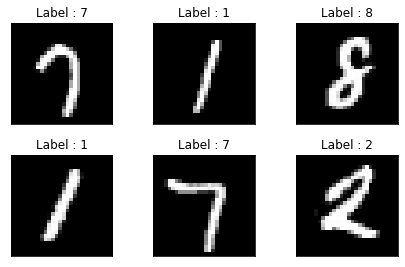

In [63]:
import matplotlib.pyplot as plt
## Affichage de quelques chiffres
ex,lab = next(iter(all_train_loader))
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(ex[i].view(WIDTH,HEIGHT), cmap='gray', interpolation='none')
  plt.title("Label : {}".format(lab[i]))
  plt.xticks([])
  plt.yticks([])
  ax = plt.gca()
  ax.set_facecolor('white')


##  D.3. <span class="alert-success"> Exercice : Classification multi-labels, nombre de couche de couches, fonction de coût </span>

L'objectif est de classer chaque image parmi les 10 chiffres qu'ils représentent. Le réseau aura donc 10 sorties, une par classe, chacune représentant la probabilité d'appartenance à chaque classe. Pour garantir une distribution de probabilité en sortie, il faut utiliser le module <a href=https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html> **Softmax** </a> : $$Sotfmax(\mathbf{x}) = \frac{\exp{x_i}}{\sum_{i=1^d} x_i}$$ qui permet de normaliser le vecteur de sortie.

* Faites quelques exemples de réseau à 1, 2, 3 couches et en faisant varier les nombre de neurones par couche. Utilisez un coût moindre carré dans un premier temps. Pour superviser ce coût, on doit construire le vecteur one-hot correspondant à la classe : un vecteur qui ne contient que des 0 sauf à l'index de la classe qui contient un 1 (utilisez ```torch.nn.functional.one_hot```).  Comparez les courbes de coût et d'erreurs en apprentissage et en test selon l'architecture.
* Le coût privilégié en multi-classe est la *cross-entropy**. Ce coût représente la négative log-vraisemblance : $$NNL(y,\mathbf{x}) = -x_{y}$$ en notant $y$ l'indice de la classe et $\mathbf{x}$ le vecteur de log-probabilité inféré. On peut utiliser soit son implémentation par le module <a href=https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss>**NLLLoss**</a>, soit - plus pratique - le module <a href=https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html>**CrossEntropyLoss** <a>  qui combine un *logSoftmax* et la cross entropie, ce qui évite d'avoir à ajouter un module de *Softmax* en sortie du réseau. Utilisez ce dernier coût et observez les changements.
* Changez la fonction d'activation en une ReLU et observez l'effet.

In [65]:
from torch import nn
from torch.nn.functional import one_hot
from tqdm import tqdm

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

notebook.display()

## On utilise qu'une partie du training test pour mettre en évidence le sur-apprentissage
TRAIN_RATIO = 0.01
train_length = int(len(train_set)*TRAIN_RATIO)
ds_train, ds_test = random_split(train_set, (train_length, len(train_set)- train_length))

#On utilise un DataLoader pour faciliter les manipulations, on fixe  la taille du mini batch à 300
train_loader = DataLoader(ds_train,batch_size=300,shuffle=True)
test_loader = DataLoader(ds_test,batch_size=300,shuffle=False)


def accuracy(yhat,y):
    # si  y encode les indexes
    if len(y.shape)==1 or y.size(1)==1:
        return (torch.argmax(yhat,1).view(y.size(0),-1)== y.view(-1,1)).double().mean()
    # si y est encodé en onehot
    return (torch.argmax(yhat,1).view(-1) == torch.argmax(y,1).view(-1)).double().mean()


Selecting TensorBoard with logdir /tmp/logs (started 0:30:56 ago; port 6006, pid 414745).


In [72]:

# On construit 4 réseaux à tester
# 10 sorties pour chaque réseau, une par classe. 
# Comme on va utiliser une cross entropy loss, on ne rescale pas les sorties (la cross entropy combine un softmax + NLLloss)
# On pourrait utiliser une BCE loss (vu qu'on est dans un cas binaire pour chaque sortie), dans ce cas il faudrait ajouter une sigmoide en derniere couche.

##  TODO 


import torch
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
import time
import os
%load_ext tensorboard
%tensorboard --logdir /tmp/logs

notebook.display()

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

def save_state(epoch,model,optim,fichier):
    state = {'epoch' : epoch, 'model_state': model.state_dict(), 'optim_state': optim.state_dict()}
    torch.save(state,fichier)

def load_state(fichier,model,optim):
    epoch = 0
    if os.path.isfile(fichier):
        state = torch.load(fichier)
        model.load_state_dict(state['model_state'])
        optim.load_state_dict(state['optim_state'])
        epoch = state['epoch']
    return epoch

# Datasets

## On utilise qu'une partie du training test pour mettre en évidence le sur-apprentissage
TRAIN_RATIO = 0.01
train_length = int(len(train_set)*TRAIN_RATIO)
ds_train, ds_test = random_split(train_set, (train_length, len(train_set)- train_length))

#On utilise un DataLoader pour faciliter les manipulations, on fixe  la taille du mini batch à 300
train_loader = DataLoader(ds_train,batch_size=300,shuffle=True)
test_loader = DataLoader(ds_test,batch_size=300,shuffle=False)

EPOCHS = 1000
BATCH_SIZE = 300

net1 = torch.nn.Sequential(torch.nn.Linear(train_loader.size(1),5),torch.nn.Tanh(),torch.nn.Linear(5,1))
net1.name = "net1"
CHECK_FILE = "/tmp/net1.chk"
net1 = net1.to(device)

net2 = torch.nn.Sequential(torch.nn.Linear(train_loader.size(1),5),torch.nn.ReLU(),torch.nn.Linear(5,1))
net2.name = "net2"
CHECK_FILE = "/tmp/net2.chk"
net2 = net2.to(device)

net3 = torch.nn.Sequential(torch.nn.Linear(train_loader.size(1),5),torch.nn.Tanh(),train_loader.size(1)/2,5),torch.nn.Tanh(),torch.nn.Linear(5,1)
net3.name = "net3"
CHECK_FILE = "/tmp/net3.chk"
net3 = net3.to(device)

net4 = torch.nn.Sequential(torch.nn.Linear(train_loader.size(1),5),torch.nn.ReLU(),train_loader.size(1)/2,5),torch.nn.ReLU(),torch.nn.Linear(5,1)
net4.name = "net4"
CHECK_FILE = "/tmp/net4.chk"
net4 = net4.to(device)

MyLoss = torch.nn.NLLLoss()
optim = torch.optim.SGD(params=net.parameters(),lr=1e-5)

# start_epoch = load_state(CHECK_FILE,net,optim)


for model in [net1, net2, net3, net4]:
    # On créé un writer avec la date du modèle pour s'y retrouver
    summary = SummaryWriter(f"/tmp/logs/{model.name}-{time.asctime()}")
    for epoch in range(EPOCHS):
        # Apprentissage
        # .train() inutile tant qu'on utilise pas de normalisation ou de récurrent
        model.train()
        cumloss = 0
        for xbatch, ybatch in train_loader:
            xbatch, ybatch = xbatch.to(device), ybatch.to(device)
            outputs = model(xbatch)
            loss = MyLoss(outputs.view(-1),ybatch)
            optim.zero_grad()
            loss.backward()
            optim.step()
            cumloss += loss.item()
        summary.add_scalar("loss/train loss",  cumloss/len(train_loader),epoch)
        
        if epoch % 10 == 0: 
            save_state(epoch,model,optim,CHECK_FILE)
            # Validation
            # .eval() inutile tant qu'on utilise pas de normalisation ou de récurrent
            model.eval()
            with torch.no_grad():
                cumloss = 0
                for xbatch, ybatch in test_loader:
                    xbatch, ybatch = xbatch.to(device), ybatch.to(device)
                    outputs = model(xbatch)
                cumloss += MyLoss(outputs.view(-1),ybatch).item()
            summary.add_scalar("loss/validation loss", cumloss/len(test_loader) ,epoch)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 414745), started 1:02:26 ago. (Use '!kill 414745' to kill it.)

Selecting TensorBoard with logdir /tmp/logs (started 1:02:26 ago; port 6006, pid 414745).


AttributeError: 'DataLoader' object has no attribute 'size'

## D.4.  <span class="alert-success"> Exercice : Régularisation des réseaux </span>


### Pénalisation des couches
Une première technique pour éviter le sur-apprentissage est de régulariser chaque couche par une pénalisation sur les poids, i.e. de favoriser des poids faibles. On parle de pénalisation L1 lorsque la pénalité est de la forme $\|W\|_1$ et L2 lorsque la norme L2 est utilisée : $\|W\|_2^2$. En pratique, cela consiste à rajouter à la fonction de coût globale du réseau un terme en $\lambda Pen(W)$ pour les paramètres de chaque couche que l'on veut régulariser (cf code ci-dessous).

Expérimentez avec une norme L2 dans $\{0,10^{-5},10^{-4},10^{-3},10^{-2},\}$, observez les histogrammes de la distribution des poids et l'évolution de la pénalisation et du coût en fonction du nombre d'époques. Utilisez pour cela  un réseau à 3 couches chacune de taille 100 et un coût de CrossEntropy.


In [ ]:

def run_l2(model,epochs,l2):
    writer = SummaryWriter(f"/tmp/logs/l2-{l2}-{model.name}")
    optim = torch.optim.Adam(model.parameters(),lr=1e-3)
    model = model.to(device)
    print(f"running {model.name}-{l2}")
    loss = nn.CrossEntropyLoss()
    for epoch in tqdm(range(epochs)):
        cumloss, cumacc, count = 0, 0, 0
        for x,y in train_loader:
            optim.zero_grad()
            x,y = x.view(x.size(0),-1).to(device), y.to(device)
            yhat = model(x)
            l = loss(yhat,y)
            # Ajout d'une pénalisation L2 sur toutes les couches
            l2_loss = 0.
            for name, value in model.named_parameters():
                if name.endswith(".weight"):
                    l2_loss += (value ** 2).sum()
            l += l2*l2_loss
            l.backward()
            optim.step()
            cumloss += l*len(x)
            cumacc += accuracy(yhat,y)*len(x)
            count += len(x)
        writer.add_scalar('loss/train',cumloss/count,epoch)
        writer.add_scalar('accuracy/train',cumacc/count,epoch)
        writer.add_scalar('loss/l2',l2_loss,epoch)
        if epoch % 50 == 0:
            with torch.no_grad():
                cumloss, cumacc, count = 0, 0, 0
                for x,y in test_loader:
                    x,y = x.view(x.size(0),-1).to(device), y.to(device)
                    yhat = model(x)
                    cumloss += loss(yhat,y)*len(x)
                    cumacc += accuracy(yhat,y)*len(x)
                    count += len(x)
                writer.add_scalar(f'loss/test',cumloss/count,epoch)
                writer.add_scalar('accuracy/test',cumacc/count,epoch)
                ix = 0
                for module in model.layers:
                    if isinstance(module, nn.Linear):
                        writer.add_histogram(f'linear/{ix}/weight',module.weight, epoch)
                        ix += 1

##  TODO 

### Dropout

Une autre technique très utilisée est le <a href=https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html> **Dropout** </a>. L’idée du Dropout est proche du moyennage de modèle : en entraînant k modèles de manière indépendante, on réduit la variance du modèle. Entraîner k modèles présente un surcoût non négligeable, et l’intérêt du Dropout est de réduire la complexité mémoire/temps de calcul. Le Dropout consiste à chaque itération à *geler* certains neurones aléatoirement dans le réseau en fixant leur sortie à zéro. Cela a pour conséquence de rendre plus robuste le réseau.

Le comportement du réseau est donc différent en apprentissage et en inférence. Il est obligatoire d'utiliser ```model.train()``` et ```model.eval()``` pour différencier les comportements.
Testez sur quelques réseaux pour voir l'effet du dropout.

In [ ]:

def run_dropout(model,epochs):
    writer = SummaryWriter(f"/tmp/logs/{model.name}")
    optim = torch.optim.Adam(model.parameters(),lr=1e-3)
    model = model.to(device)
    print(f"running {model.name}")
    loss = nn.CrossEntropyLoss()
    for epoch in tqdm(range(epochs)):
        cumloss, cumacc, count = 0, 0, 0
        model.train()
        for x,y in train_loader:
            optim.zero_grad()
            x,y = x.view(x.size(0),-1).to(device), y.to(device)
            yhat = model(x)
            l = loss(yhat,y)
            l.backward()
            optim.step()
            cumloss += l*len(x)
            cumacc += accuracy(yhat,y)*len(x)
            count += len(x)
        writer.add_scalar('loss/train',cumloss/count,epoch)
        writer.add_scalar('accuracy/train',cumacc/count,epoch)
        if epoch % 50 == 0:
            model.eval()
            with torch.no_grad():
                cumloss, cumacc, count = 0, 0, 0
                for x,y in test_loader:
                    x,y = x.view(x.size(0),-1).to(device), y.to(device)
                    yhat = model(x)
                    cumloss += loss(yhat,y)*len(x)
                    cumacc += accuracy(yhat,y)*len(x)
                    count += len(x)
                writer.add_scalar(f'loss/test',cumloss/count,epoch)
                writer.add_scalar('accuracy/test',cumacc/count,epoch)


def get_dropout_net(in_features,out_features,dims,dropout):
    layers = []
    dim = in_features
    
    for newdim in dims:
        layers.append(nn.Linear(dim, newdim))
        dim = newdim
        if dropout>0: layers.append(nn.Dropout(dropout))
        layers.append(nn.ReLU())
        dim = newdim
    layers.append(nn.Linear(dim,out_features))
    return nn.Sequential(*layers)

##  TODO 

### BatchNorm

On sait que les données centrées réduites permettent un apprentissage plus rapide et stable d’un modèle ; bien qu’on puisse faire en sorte que les données en entrées soient centrées réduites, cela est plus délicat pour les couches internes d’un réseau de neurones. La technique de <a href=https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html> **BatchNorm**</a> consiste à ajouter une couche qui a pour but de centrer/réduire les données en utilisant une moyenne/variance glissante (en inférence) et les statistiques du batch (en
apprentissage).

Tout comme pour le dropout, il est nécessaire d'utiliser ```model.train()``` et ```model.eval()```. 
Expérimentez la batchnorm. 

In [ ]:
def get_batchnorm_net(in_features,out_features,dims):
    layers = []
    dim = in_features
    for newdim in dims:
        layers.append(nn.Linear(dim, newdim))
        dim = newdim
        layers.append(nn.BatchNorm1d(dim))
        layers.append(nn.ReLU())
        dim = newdim
    layers.append(nn.Linear(dim,out_features))
    return nn.Sequential(*layers)
##  TODO 

# Construction du sujet à partir de la correction

In [ ]:
###  TODO )"," TODO ",\
    txt, flags=re.DOTALL))
f2.close()

### </CORRECTION> ###